In [77]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [92]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [94]:
df.mean()

id                     91989.500000
player_fifa_api_id    165671.524291
player_api_id         135900.617324
overall_rating            68.288295
potential                 73.126548
crossing                  54.836567
finishing                 49.694235
heading_accuracy          57.005805
short_passing             62.145990
volleys                   48.738958
dribbling                 58.906261
curve                     52.184625
free_kick_accuracy        49.156562
long_passing              56.810553
ball_control              63.100838
acceleration              67.351912
sprint_speed              67.742018
agility                   64.998081
reactions                 65.803330
balance                   64.228190
shot_power                61.527569
jumping                   65.981498
stamina                   66.733919
strength                  67.118150
long_shots                53.097055
aggression                60.671097
interceptions             51.772940
positioning               55

In [39]:
df.fillna(df.mean,inplace=True)

In [40]:
df.stamina.head(2)

0    54.0
1    54.0
Name: stamina, dtype: float64

In [41]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [42]:
#Using multiple linear regression
x=df[['potential', 'strength', 'vision', 'shot_power','stamina']]
y=df['overall_rating']

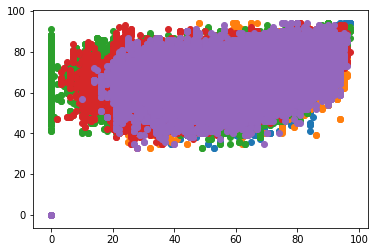

In [43]:
plt.scatter(df.potential,y)
plt.scatter(df.strength,y)
plt.scatter(df.vision,y)
plt.scatter(df.shot_power,y)
plt.scatter(df.stamina,y) 
# In this we can see there are 3 outlier points.

In [44]:
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


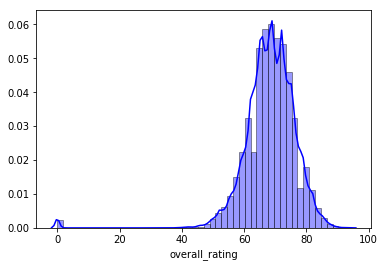

In [47]:
sns.distplot(y, hist=True, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [95]:
# Outlier treatment
for col in x.columns:
    q1 = x[col].quantile(0.25)
    q3 = x[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    percentiles = x[col].quantile([0.01,0.99]).values
    x[col][x[col] <= low] = percentiles[0]
    x[col][x[col] >= high] = percentiles[1]



/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [96]:
percentiles[0]

25.0

In [58]:
x.quantile(0.1)

potential     65.0
strength      51.0
vision        34.0
shot_power    36.0
stamina       50.0
Name: 0.1, dtype: float64

In [71]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
print(lm.intercept_)
print(lm.coef_)

-5.970438705000831
[0.74600806 0.17757588 0.09096692 0.03675862 0.00202177]


In [79]:
lm1 = smf.ols(formula='overall_rating ~  potential + strength + vision + shot_power+ stamina ', data=df).fit()

In [80]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 1.232e+05
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        14:56:13   Log-Likelihood:            -5.1749e+05
No. Observations:              183978   AIC:                         1.035e+06
Df Residuals:                  183972   BIC:                         1.035e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3572      0.088     15.389      0.000       1.184       1.530
potential      0.7186      0.001    535.630      0.000       0.716       0.721
strength       0.1321      0.001    161.615      0.000       0.130       0.134
vision         0.0537      0.001     67.597      0.000       0.052       0.055
shot_power     0.0441      0.001     55.764      0.000       0.043       0.046
stamina       -0.0039      0.001     -4.390      0.000      -0.006      -0.002
==============================================================================
Omnibus:                    16365.925   Durbin-Watson:                   0.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25707.723
Skew:                          -0.676   Prob(JB):                         0.00
Kurtosis:                       4.235   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
lm1.pvalues 


Intercept     2.093526e-53
potential     0.000000e+00
strength      0.000000e+00
vision        0.000000e+00
shot_power    0.000000e+00
stamina       1.134354e-05
dtype: float64

In [85]:
lm1.rsquared # R-squared is between 0 and 1, higher values are better because it means that more variance is explained by the model

0.7700616562367377

In [87]:
# Plotting density plot

import statsmodels.formula.api as sm
results = sm.ols(formula='y ~ x', data=df).fit()
y_pred = results.predict(x)
residual = y.values-y_pred
residual

0        -0.535014
1        -0.535014
2        -1.804973
3        -1.931240
4        -1.931240
5         4.556179
6         4.556179
7         4.393154
8         4.393154
9         4.393154
10        2.901137
11        3.155129
12        2.901137
13        3.586334
14        2.094318
15        2.094318
16        1.094318
17       -0.399720
18       -0.399720
19        0.052779
20        0.052779
21        0.052779
22       -0.492701
23       -0.490679
24       -1.232644
25       -1.232644
26       -1.232644
27       -1.232644
28       -1.232644
29       -2.685457
            ...   
183948   -1.598604
183949   -1.598604
183950   -5.280597
183951   -4.788581
183952   -4.788581
183953   -0.877408
183954   -0.877408
183955   -1.268265
183956   -1.268265
183957   -0.923283
183958   -0.923283
183959   -0.923283
183960   -4.822101
183961   -4.822101
183962   -4.824123
183963   -1.834232
183964   -1.834232
183965    0.165768
183966    3.165768
183967    4.021393
183968    4.418075
183969    4.

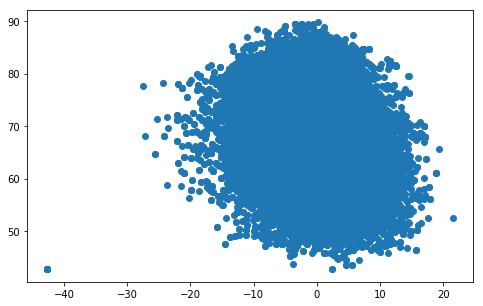

In [90]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(residual, y_pred)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


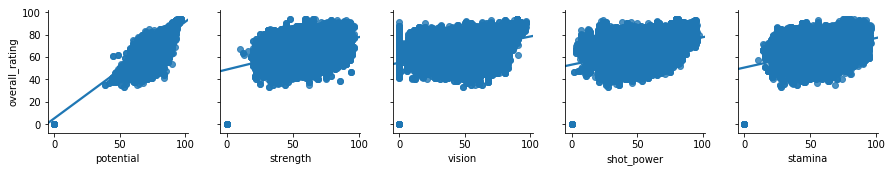

In [141]:
#Plotting the Least Squares line

sns.pairplot(df, x_vars=['potential', 'strength', 'vision', 'shot_power','stamina'],y_vars=['overall_rating'],kind='reg') #

In [107]:
#Accuracy measures

In [133]:
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [137]:
X = sm.add_constant(x) 
model1 = sm.OLS(y, X).fit() 
prediction1 = model1.predict(X)
model1.summary()
residual = y-prediction1


In [138]:
print(metrics.mean_absolute_error(y, prediction1))
print(metrics.mean_squared_error(y, prediction1))
print(np.sqrt(metrics.mean_squared_error(y, prediction1)))

3.397366248685297
25.612207021672464
5.060850424748045


In [139]:
# Since R-squared will always increase as you add more features to the model, I use test train split

# Model evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.008061825555917
